In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
data = pd.read_csv('Ecommerce Customers.csv')


In [2]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


data.describe(include='all') # summary status of all variables in your dataset

In [58]:
data.describe()  # summary status of only numeric variables in your dataset

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [32]:
import warnings
warnings.filterwarnings('ignore')
data.corr(numeric_only=True)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


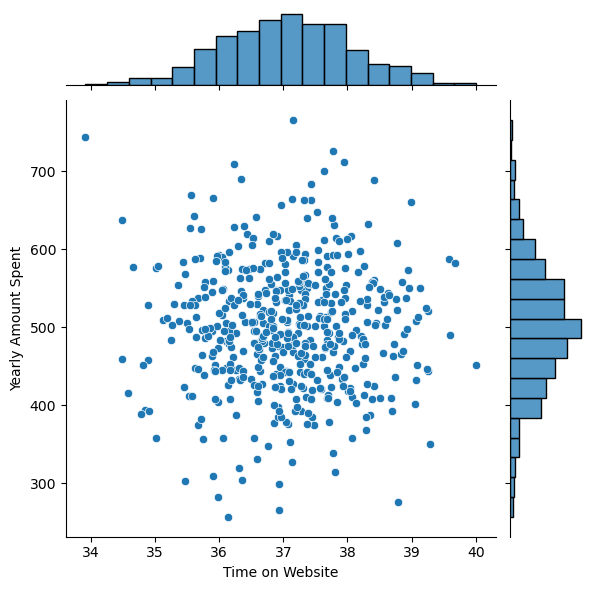

In [33]:
import seaborn as sns
sns.jointplot(x = 'Time on Website', y = 'Yearly Amount Spent', data=data)
plt.show()

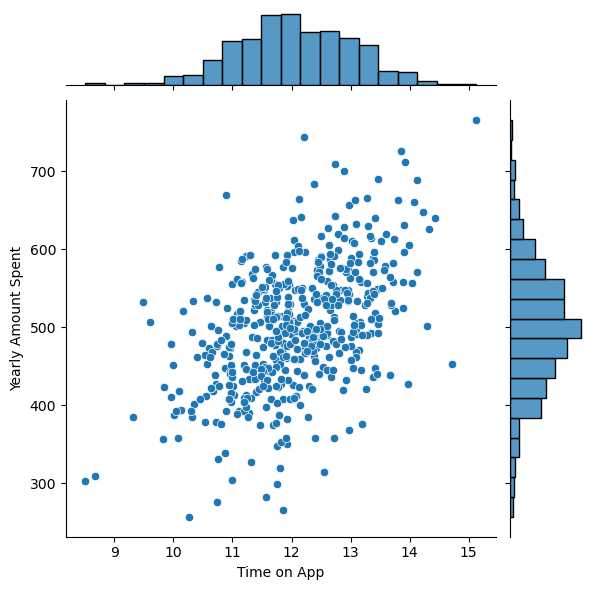

In [34]:
sns.jointplot(x = 'Time on App', y = 'Yearly Amount Spent', data=data)
plt.show()

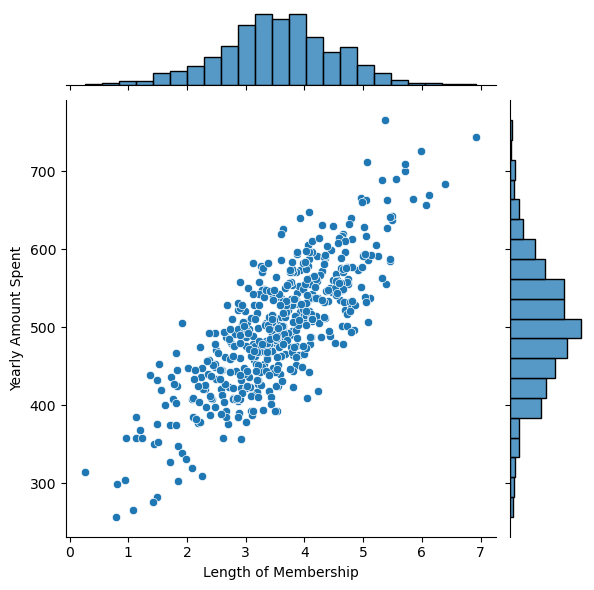

In [36]:
import seaborn as sns
sns.jointplot(x = 'Length of Membership', y = 'Yearly Amount Spent', data=data)
plt.show()

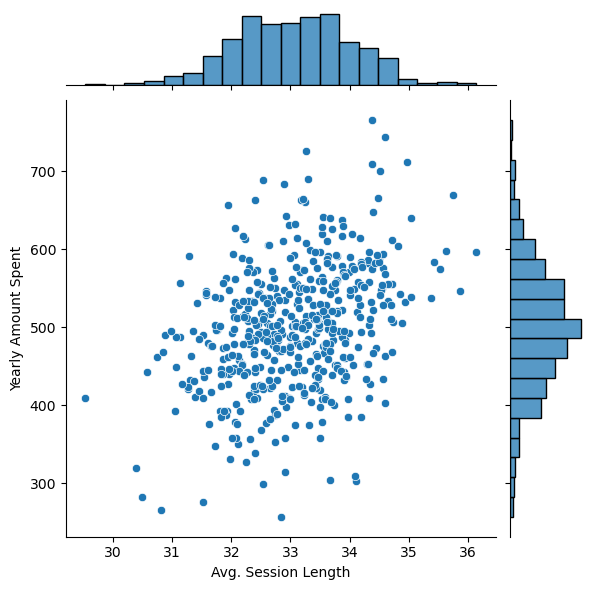

In [35]:
import seaborn as sns
sns.jointplot(x = 'Avg. Session Length', y = 'Yearly Amount Spent', data=data)
plt.show()

In [55]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

Divide the data into subsets of train and test data

In [37]:
X= data[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [38]:
Y = data['Yearly Amount Spent']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.25, random_state=0)

In [60]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [68]:
model.coef_
#higher the beta value more important is the variable 
#b1,b2,b3,b4

array([25.8466897 , 38.81582825,  0.20191541, 61.74820022])

In [69]:
y_pred = model.predict(X_test)
print(y_pred)

[438.38828993 489.87912877 370.64151577 514.37404963 496.32026503
 451.29279839 458.06660753 336.89276993 528.25388182 663.31704278
 559.74505053 526.08403059 552.2666673  457.34723714 450.32757843
 432.07243558 563.49098202 408.83311971 599.61369349 486.97464621
 716.28720652 496.96707494 411.71628067 556.29816291 551.32361174
 398.40552149 421.3192807  395.6763062  548.32209658 463.59145823
 558.49053354 505.31208848 505.85283789 464.06854533 425.97536477
 401.03979978 503.80451158 430.54260512 570.00202003 422.07929224
 487.66473058 602.27337836 616.11566136 589.29672921 449.9893809
 380.10689082 558.50487097 462.99820434 502.29871803 401.49519991
 524.32671862 416.85563469 576.68875978 478.2795989  457.25927104
 397.8735013  564.86367172 305.40669074 562.49057886 476.83985037
 498.89242109 434.2497342  464.52456142 577.1308694  503.80281642
 356.815947   508.8429179  417.2000656  635.19398406 455.59348954
 452.44811824 766.85804752 519.09912031 457.52434093 379.92395294
 376.160995

In [70]:
model.intercept_
#this one is b0

-1048.3289680245878

In [71]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
print(r2)

0.9851050788797161


In [77]:
results=pd.DataFrame(model.coef_ , X.columns)
results.colums=['kk']
results

,0
Avg. Session Length,25.846690
Time on App,38.815828
Time on Website,0.201915
Length of Membership,61.748200


Text(0, 0.5, 'Prediction')

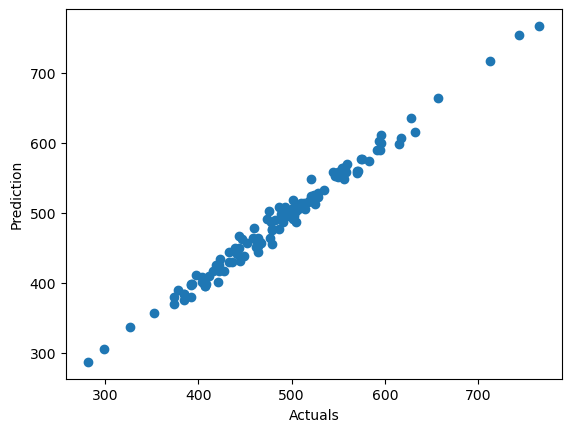

In [74]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actuals')
plt.ylabel('Prediction')